In [1]:
using LinearAlgebra
using PyPlot

In [2]:
# Discrete dynamics
h = 0.1   # time step
B = [0.5*h*h; h]
A = I + [0 1; 0 0]*h

2×2 Array{Float64,2}:
 1.0  0.1
 0.0  1.0

In [3]:
nx= 2      # number of states
nu = 1     # number of controls
Tf = 10.0   # final time
N = Int(Tf/h)+1    # number of time steps
times = Array(range(0,Tf, step=h));

In [4]:
x0 = [1.0; 0.0]  # initial state
xs = [0.0; 0.0]  # target state

2-element Array{Float64,1}:
 0.0
 0.0

In [5]:
# Cost weights
Q = 1.0*I(nx)
R = 0.1*I(nu)
Qf = 1.0*I(nx)

2×2 Diagonal{Float64,Array{Float64,1}}:
 1.0   ⋅ 
  ⋅   1.0

In [6]:
function get_J(xhist,uhist)
    cost = 0.5*(xhist[:,end]-xs)'*Qf*(xhist[:,end]-xs)
    for k = 1:(N-1)
        cost = cost + 0.5*(xhist[:,k]-xs)'*Q*(xhist[:,k]-xs) + 0.5*uhist[:,k]'*R*uhist[:,k]
    end
    return cost
end

get_J (generic function with 1 method)

In [7]:
function forward_rollout(xhist, uhist)
    xnew = zeros(nx,N)
    xnew[:,1] = xhist[:,1]
    for k = 1:(N-1)
        xnew[:,k+1] .= A*xnew[:,k] + B.*(uhist[:,k])
    end
    return xnew
end

forward_rollout (generic function with 1 method)

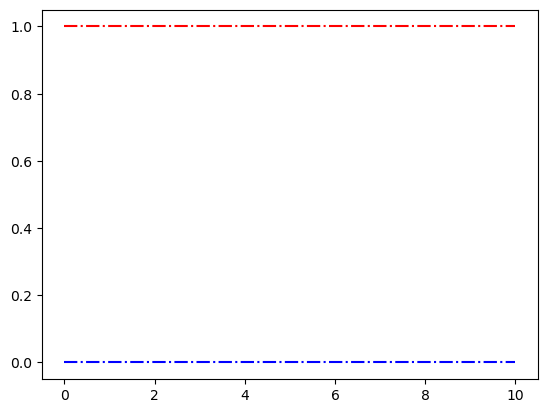

50.5

In [8]:
# initial guess
x_hist = repeat(x0, 1, N)
u_hist = zeros(nu, N-1)
x_hist = forward_rollout(x_hist, u_hist)
plot(times, x_hist[1,:],"r-.")
plot(times, x_hist[2,:],"b-.")
cost = get_J(x_hist,u_hist)

In [9]:
λ_hist = zeros(nx, N)
Δu = ones(nu, N-1)
β = 0.01  # for line search torlerance
α = 1.0
ϕ = 0.5
ϵ = 1e-2
iter = 0
while maximum(abs.(Δu[1,:])) > ϵ && iter < 2000
    # backword pass
    λ_hist[:,end] = Qf * x_hist[:,end]
    for i = N-1:-1:1
        Δu[:, i] = -u_hist[:, i]-R\B'*λ_hist[:, i+1]
        λ_hist[:, i] = Q*x_hist[:, i] + A' * λ_hist[:, i+1]
        
    end
    
    # forward pass
    u_new = u_hist .+ α .* Δu
    x_new  = forward_rollout(x_hist, u_new)
    while get_J(x_new, u_new) > get_J(x_hist, u_hist) - β * α * norm(Δu) * norm(Δu)
        α = ϕ * α
        u_new = u_hist + α .* Δu
        x_new  = forward_rollout(x_hist, u_new)
    end
    u_hist .= u_new
    x_hist .= x_new
    iter = iter + 1
    cst = get_J(x_new, u_new)
    println("Iter: $iter || Cost: $cst")
end

Iter: 1 || Cost: 20.571987745728006
Iter: 2 || Cost: 19.895676159535753
Iter: 3 || Cost: 19.34154632546425
Iter: 4 || Cost: 18.822589078407283
Iter: 5 || Cost: 18.33624313355444
Iter: 6 || Cost: 17.88034652927374
Iter: 7 || Cost: 17.452882396148784
Iter: 8 || Cost: 17.051968591031066
Iter: 9 || Cost: 16.675848683001483
Iter: 10 || Cost: 16.322883544354905
Iter: 11 || Cost: 15.991543504219658
Iter: 12 || Cost: 15.680401027160014
Iter: 13 || Cost: 15.388123881634833
Iter: 14 || Cost: 15.11346876553549
Iter: 15 || Cost: 14.855275358220034
Iter: 16 || Cost: 14.61246077050566
Iter: 17 || Cost: 14.38401436599282
Iter: 18 || Cost: 14.168992928873985
Iter: 19 || Cost: 13.966516155044529
Iter: 20 || Cost: 13.77576244488258
Iter: 21 || Cost: 13.595964977513734
Iter: 22 || Cost: 13.426408047725952
Iter: 23 || Cost: 13.266423647960758
Iter: 24 || Cost: 13.115388278982847
Iter: 25 || Cost: 12.972719973926784
Iter: 26 || Cost: 12.837875521444149
Iter: 27 || Cost: 12.710347874628987
Iter: 28 || Cost:

Iter: 291 || Cost: 8.296350411724893
Iter: 292 || Cost: 8.292378465787703
Iter: 293 || Cost: 8.288426979707765
Iter: 294 || Cost: 8.284495784693075
Iter: 295 || Cost: 8.280584713680586
Iter: 296 || Cost: 8.276693601317
Iter: 297 || Cost: 8.272822283939757
Iter: 298 || Cost: 8.268970599558104
Iter: 299 || Cost: 8.265138387834595
Iter: 300 || Cost: 8.261325490066593
Iter: 301 || Cost: 8.257531749168162
Iter: 302 || Cost: 8.253757009652071
Iter: 303 || Cost: 8.250001117611948
Iter: 304 || Cost: 8.246263920704855
Iter: 305 || Cost: 8.242545268133835
Iter: 306 || Cost: 8.23884501063074
Iter: 307 || Cost: 8.2351630004393
Iter: 308 || Cost: 8.23149909129836
Iter: 309 || Cost: 8.227853138425273
Iter: 310 || Cost: 8.224224998499523
Iter: 311 || Cost: 8.220614529646548
Iter: 312 || Cost: 8.217021591421668
Iter: 313 || Cost: 8.213446044794377
Iter: 314 || Cost: 8.20988775213254
Iter: 315 || Cost: 8.206346577186986
Iter: 316 || Cost: 8.202822385076319
Iter: 317 || Cost: 8.199315042271623
Iter: 318

Iter: 574 || Cost: 7.630104088577075
Iter: 575 || Cost: 7.628667596838073
Iter: 576 || Cost: 7.627234833103683
Iter: 577 || Cost: 7.62580578187855
Iter: 578 || Cost: 7.624380427764281
Iter: 579 || Cost: 7.622958755458634
Iter: 580 || Cost: 7.621540749754696
Iter: 581 || Cost: 7.620126395540029
Iter: 582 || Cost: 7.618715677795949
Iter: 583 || Cost: 7.617308581596617
Iter: 584 || Cost: 7.615905092108362
Iter: 585 || Cost: 7.614505194588801
Iter: 586 || Cost: 7.613108874386143
Iter: 587 || Cost: 7.6117161169383625
Iter: 588 || Cost: 7.610326907772489
Iter: 589 || Cost: 7.608941232503836
Iter: 590 || Cost: 7.6075590768352495
Iter: 591 || Cost: 7.6061804265563895
Iter: 592 || Cost: 7.604805267543001
Iter: 593 || Cost: 7.603433585756177
Iter: 594 || Cost: 7.602065367241682
Iter: 595 || Cost: 7.600700598129185
Iter: 596 || Cost: 7.599339264631635
Iter: 597 || Cost: 7.597981353044514
Iter: 598 || Cost: 7.596626849745191
Iter: 599 || Cost: 7.5952757411921885
Iter: 600 || Cost: 7.59392801392457

Iter: 796 || Cost: 7.381740364291197
Iter: 797 || Cost: 7.380869795615926
Iter: 798 || Cost: 7.380000954473091
Iter: 799 || Cost: 7.379133835750763
Iter: 800 || Cost: 7.37826843435769
Iter: 801 || Cost: 7.377404745223116
Iter: 802 || Cost: 7.376542763296693
Iter: 803 || Cost: 7.375682483548393
Iter: 804 || Cost: 7.374823900968351
Iter: 805 || Cost: 7.373967010566792
Iter: 806 || Cost: 7.373111807373911
Iter: 807 || Cost: 7.372258286439773
Iter: 808 || Cost: 7.371406442834164
Iter: 809 || Cost: 7.370556271646585
Iter: 810 || Cost: 7.369707767985997
Iter: 811 || Cost: 7.36886092698089
Iter: 812 || Cost: 7.368015743778996
Iter: 813 || Cost: 7.367172213547344
Iter: 814 || Cost: 7.36633033147209
Iter: 815 || Cost: 7.365490092758375
Iter: 816 || Cost: 7.36465149263031
Iter: 817 || Cost: 7.363814526330812
Iter: 818 || Cost: 7.362979189121534
Iter: 819 || Cost: 7.362145476282757
Iter: 820 || Cost: 7.3613133831132656
Iter: 821 || Cost: 7.360482904930324
Iter: 822 || Cost: 7.359654037069502
Iter

Iter: 1049 || Cost: 7.205642435683838
Iter: 1050 || Cost: 7.205087221011503
Iter: 1051 || Cost: 7.204532892378598
Iter: 1052 || Cost: 7.203979447690769
Iter: 1053 || Cost: 7.20342688486024
Iter: 1054 || Cost: 7.202875201805805
Iter: 1055 || Cost: 7.202324396452765
Iter: 1056 || Cost: 7.201774466732992
Iter: 1057 || Cost: 7.201225410584772
Iter: 1058 || Cost: 7.200677225952898
Iter: 1059 || Cost: 7.20012991078858
Iter: 1060 || Cost: 7.199583463049407
Iter: 1061 || Cost: 7.199037880699409
Iter: 1062 || Cost: 7.198493161708919
Iter: 1063 || Cost: 7.197949304054671
Iter: 1064 || Cost: 7.1974063057196425
Iter: 1065 || Cost: 7.196864164693151
Iter: 1066 || Cost: 7.196322878970729
Iter: 1067 || Cost: 7.195782446554212
Iter: 1068 || Cost: 7.195242865451567
Iter: 1069 || Cost: 7.194704133677029
Iter: 1070 || Cost: 7.194166249250968
Iter: 1071 || Cost: 7.193629210199893
Iter: 1072 || Cost: 7.1930930145564345
Iter: 1073 || Cost: 7.192557660359342
Iter: 1074 || Cost: 7.192023145653423
Iter: 1075 |

Iter: 1266 || Cost: 7.102916480193432
Iter: 1267 || Cost: 7.10251360538449
Iter: 1268 || Cost: 7.102111282319101
Iter: 1269 || Cost: 7.101709509888003
Iter: 1270 || Cost: 7.10130828698491
Iter: 1271 || Cost: 7.100907612506604
Iter: 1272 || Cost: 7.1005074853527965
Iter: 1273 || Cost: 7.100107904426245
Iter: 1274 || Cost: 7.099708868632648
Iter: 1275 || Cost: 7.099310376880703
Iter: 1276 || Cost: 7.098912428082034
Iter: 1277 || Cost: 7.098515021151226
Iter: 1278 || Cost: 7.098118155005814
Iter: 1279 || Cost: 7.097721828566247
Iter: 1280 || Cost: 7.0973260407558865
Iter: 1281 || Cost: 7.096930790501023
Iter: 1282 || Cost: 7.096536076730822
Iter: 1283 || Cost: 7.0961418983773665
Iter: 1284 || Cost: 7.095748254375601
Iter: 1285 || Cost: 7.095355143663323
Iter: 1286 || Cost: 7.094962565181236
Iter: 1287 || Cost: 7.094570517872858
Iter: 1288 || Cost: 7.094179000684559
Iter: 1289 || Cost: 7.0937880125655495
Iter: 1290 || Cost: 7.0933975524678425
Iter: 1291 || Cost: 7.0930076193462845
Iter: 12

Iter: 1510 || Cost: 7.018693399327428
Iter: 1511 || Cost: 7.018398252307392
Iter: 1512 || Cost: 7.018103456266699
Iter: 1513 || Cost: 7.017809010605971
Iter: 1514 || Cost: 7.017514914727221
Iter: 1515 || Cost: 7.017221168033869
Iter: 1516 || Cost: 7.016927769930722
Iter: 1517 || Cost: 7.016634719823965
Iter: 1518 || Cost: 7.0163420171211595
Iter: 1519 || Cost: 7.01604966123125
Iter: 1520 || Cost: 7.015757651564526
Iter: 1521 || Cost: 7.015465987532697
Iter: 1522 || Cost: 7.015174668548772
Iter: 1523 || Cost: 7.0148836940271755
Iter: 1524 || Cost: 7.01459306338365
Iter: 1525 || Cost: 7.014302776035294
Iter: 1526 || Cost: 7.014012831400565
Iter: 1527 || Cost: 7.013723228899254
Iter: 1528 || Cost: 7.013433967952502
Iter: 1529 || Cost: 7.013145047982761
Iter: 1530 || Cost: 7.0128564684138475
Iter: 1531 || Cost: 7.01256822867087
Iter: 1532 || Cost: 7.012280328180296
Iter: 1533 || Cost: 7.011992766369882
Iter: 1534 || Cost: 7.0117055426687145
Iter: 1535 || Cost: 7.01141865650719
Iter: 1536 |

Iter: 1782 || Cost: 6.9496295670264425
Iter: 1783 || Cost: 6.949411650541165
Iter: 1784 || Cost: 6.949193962396418
Iter: 1785 || Cost: 6.948976502257876
Iter: 1786 || Cost: 6.948759269791931
Iter: 1787 || Cost: 6.948542264665588
Iter: 1788 || Cost: 6.948325486546522
Iter: 1789 || Cost: 6.948108935103071
Iter: 1790 || Cost: 6.947892610004208
Iter: 1791 || Cost: 6.947676510919578
Iter: 1792 || Cost: 6.947460637519461
Iter: 1793 || Cost: 6.947244989474792
Iter: 1794 || Cost: 6.947029566457173
Iter: 1795 || Cost: 6.946814368138809
Iter: 1796 || Cost: 6.9465993941925674
Iter: 1797 || Cost: 6.9463846442919674
Iter: 1798 || Cost: 6.946170118111168
Iter: 1799 || Cost: 6.945955815324944
Iter: 1800 || Cost: 6.945741735608737
Iter: 1801 || Cost: 6.945527878638606
Iter: 1802 || Cost: 6.945314244091262
Iter: 1803 || Cost: 6.945100831643999
Iter: 1804 || Cost: 6.944887640974813
Iter: 1805 || Cost: 6.944674671762277
Iter: 1806 || Cost: 6.944461923685611
Iter: 1807 || Cost: 6.944249396424638
Iter: 180

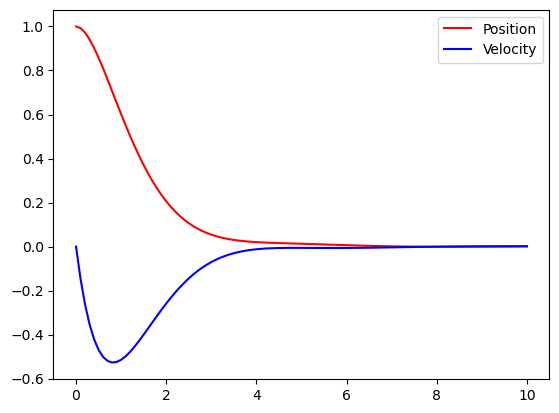

PyObject <matplotlib.legend.Legend object at 0x00000000587D4AC0>

In [10]:
plot(times, x_hist[1,:], "r", label="Position")
plot(times, x_hist[2,:], "b", label="Velocity")
legend()

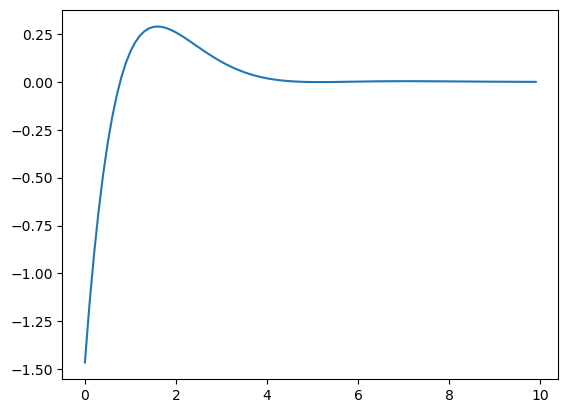

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000058852FD0>

In [11]:
plot(times[1:N-1],u_hist[:])